In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("input/"))


['Automobile_data.csv']


### Import Data

In [47]:
df_automobile = pd.read_csv("input/Automobile_data.csv")

In [48]:
df_automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


### Data Cleaning


In [49]:
df_data = df_automobile.replace('?',np.NAN)
df_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [50]:
df_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

**Missing Data**
*  fill missing data of  *normalised-losses, price, horsepower, peak-rpm, bore, stroke* with the respective column mean
*  Fill missing data category Number of doors with the mode of the column i.e. Four

In [51]:
df_automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [9]:
# 1. Find the locations where the value is NOT equal to "?"
df_temp = df_automobile[df_automobile['normalized-losses']!='?']
# 2. Find the mean of the columns with available values
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
# 3. Replace all the locations with "?" with the MEAN value calculated in step-2
df_automobile['normalized-losses'] = df_automobile['normalized-losses'].replace('?',normalised_mean).astype(int)

df_temp = df_automobile[df_automobile['price']!='?']
normalised_mean = df_temp['price'].astype(int).mean()
df_automobile['price'] = df_automobile['price'].replace('?',normalised_mean).astype(int)

df_temp = df_automobile[df_automobile['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
df_automobile['horsepower'] = df_automobile['horsepower'].replace('?',normalised_mean).astype(int)

df_temp = df_automobile[df_automobile['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
df_automobile['peak-rpm'] = df_automobile['peak-rpm'].replace('?',normalised_mean).astype(int)

df_temp = df_automobile[df_automobile['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
df_automobile['bore'] = df_automobile['bore'].replace('?',normalised_mean).astype(float)

df_temp = df_automobile[df_automobile['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
df_automobile['stroke'] = df_automobile['stroke'].replace('?',normalised_mean).astype(float)

# For the "number-of-doors" column, there is no mean, so we will replace the '?' with 'four'
df_automobile['num-of-doors'] = df_automobile['num-of-doors'].replace('?','four')
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Summary statistics of variable**

In [10]:
df_automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Univariate Analysis**

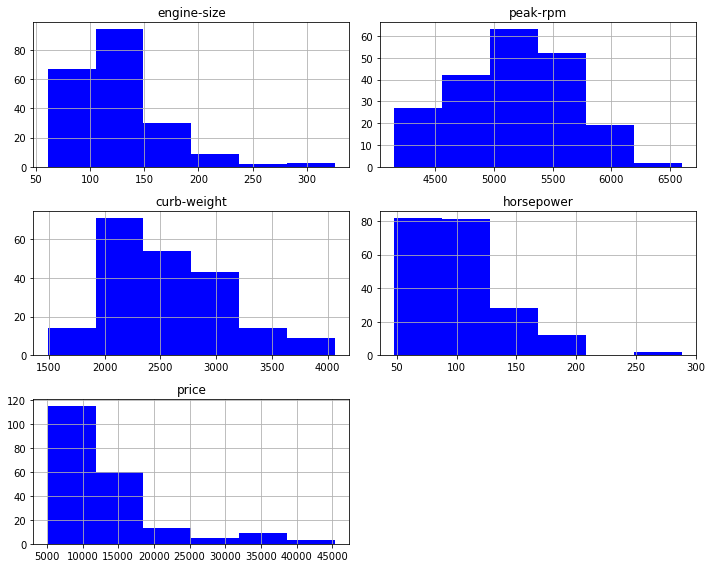

In [14]:
# 1 plt.figure(figsize=(10,8))
df_automobile[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='blue')
# 2 plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

**Findings**
*  Most of the car has a Curb Weight is in range 1900 to 3100
* The Engine Size is inrange 60 to 190
*  Most vehicle  has horsepower 50 to 125
*  Most Vehicle are in price range 5000 to 18000
*  peak rpm is  mostly distributed between 4600 to 5700


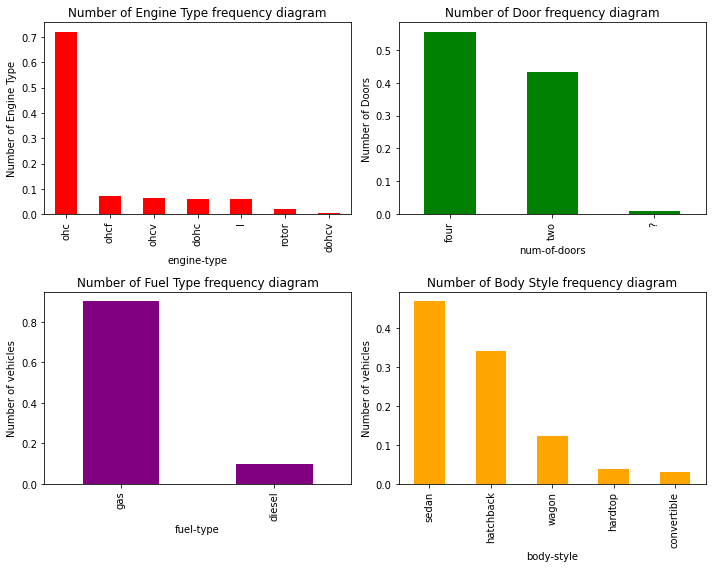

In [57]:
plt.figure(1)
plt.subplot(221)
df_automobile['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
df_automobile['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
df_automobile['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
df_automobile['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

**Findings**
*  More than 70 % of the vehicle has Ohc type of Engine
* 57% of the cars has 4 doors
* Gas is preferred by 85 % of the vehicles
*  Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

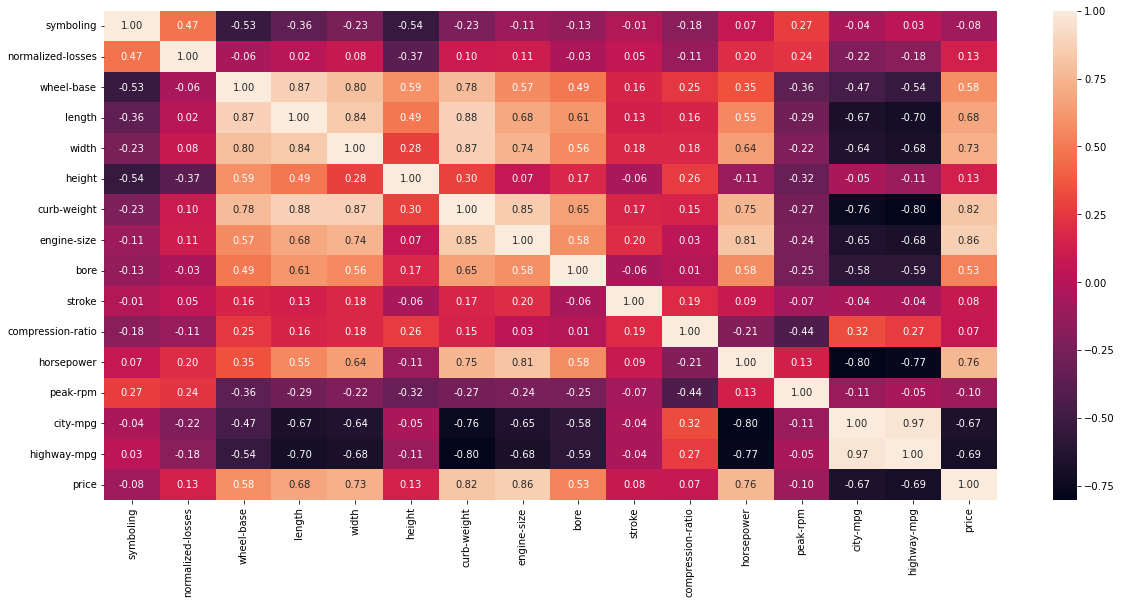

In [16]:
import seaborn as sns
corr = df_automobile.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

**Findings**

* curb-size, engine-size, horsepower  are positively corelated
* city-mpg,highway-mpg are negatively corelated

**Bivariate Analysis**

>    Price Analysis

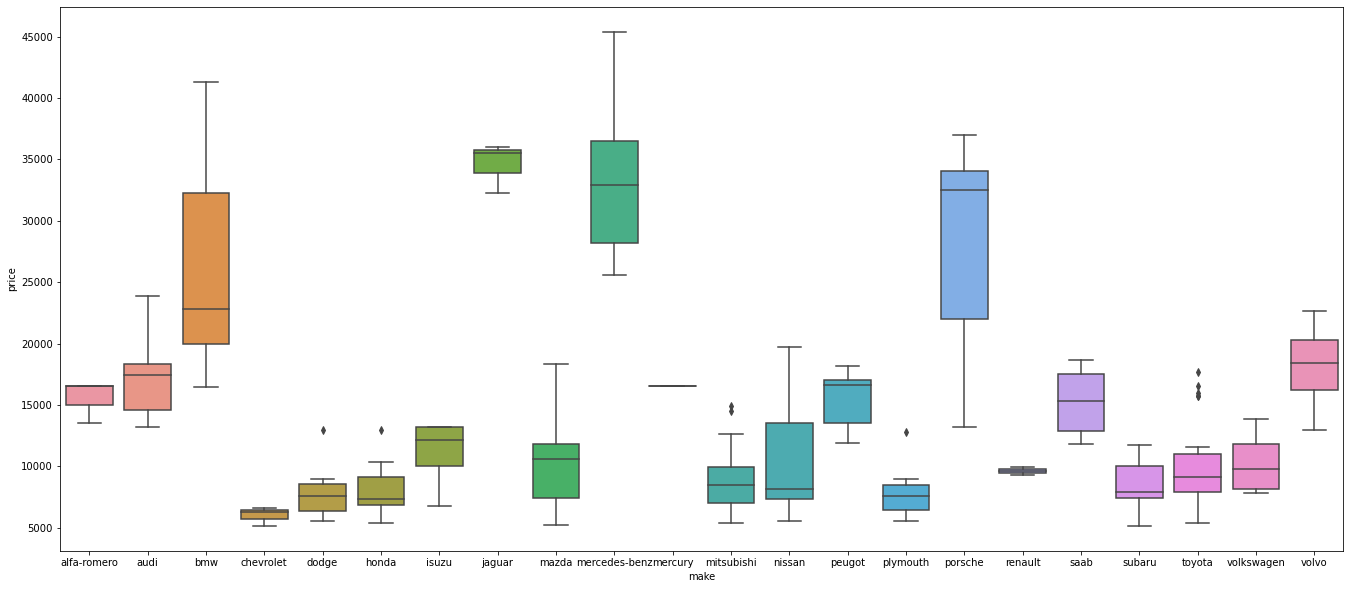

In [17]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df_automobile)

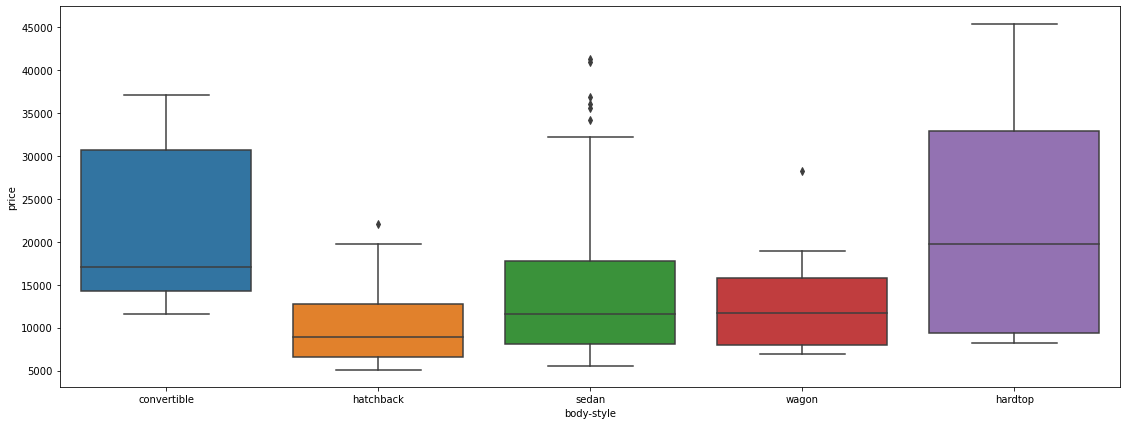

In [18]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=df_automobile)

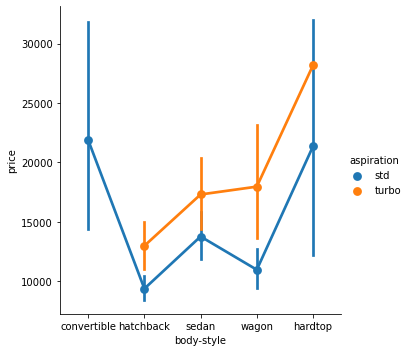

In [19]:
sns.catplot(data=df_automobile, x="body-style", y="price", hue="aspiration" ,kind="point")

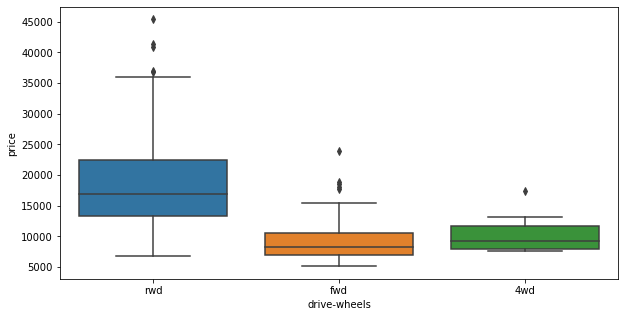

In [20]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df_automobile)

**Findings**

*   Mercedez-Benz ,BMW, Jaguar, Porshe produces expensive cars more than 25000
*   cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata produces budget models with lower prices
*   most of the cars comapany produces car in range below 25000
*  Hardtop model are expensive in prices followed by convertible and sedan body style
*  Turbo models have higher prices than for the standard model
*  Convertible has only standard edition with expensive cars
*  hatchback and sedan turbo models are available below 20000
*  rwd wheel drive vehicle have expensive prices




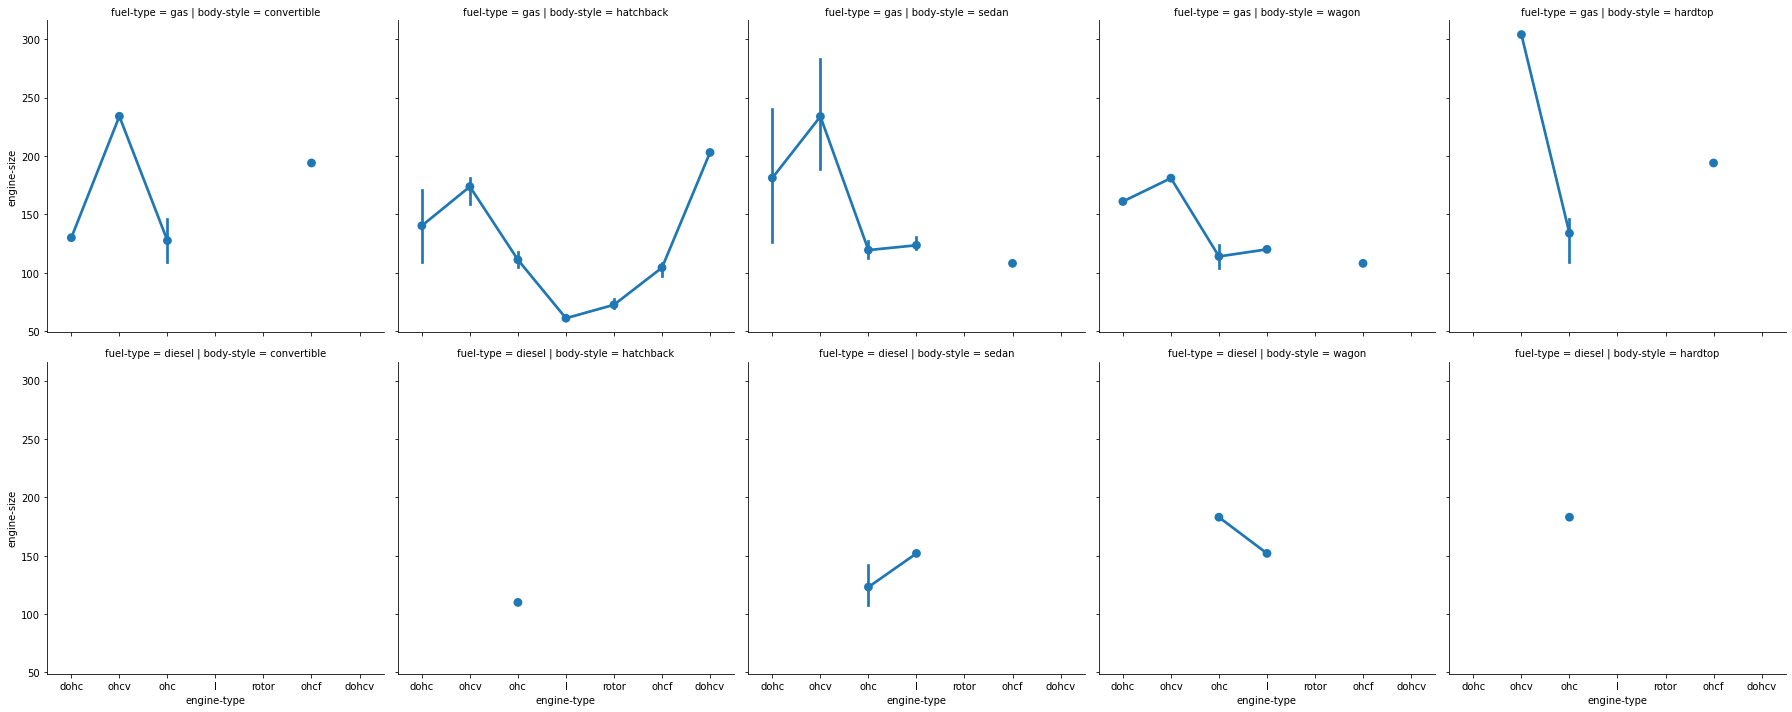

In [21]:
sns.factorplot(data=df_automobile, x="engine-type", y="engine-size", col="body-style",row="fuel-type")

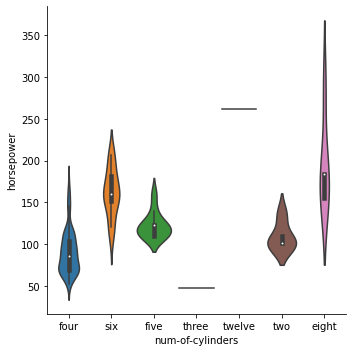

In [22]:
sns.catplot(data=df_automobile, x="num-of-cylinders", y="horsepower",kind="violin")

**Findings**
*  ohc is the most used Engine Type both for diesel and gas
*  Diesel vehicle have Engine type "ohc" and "I" and engine size ranges between 100 to 190
* Engine type ohcv has the bigger Engine size ranging from 155 to 300  
* Body-style  Hatchback uses max variety of Engine Type followed by sedan
* Body-style Convertible  is not available with Diesel Engine type
*  Vehicle with above 200 horsepower  has Eight Twelve Six cyclinders

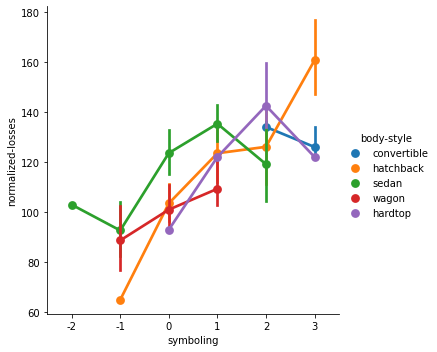

In [23]:
sns.catplot(data=df_automobile, y="normalized-losses", x="symboling" , hue="body-style" ,kind="point")

**Losses Findings**

Note :- here +3 means risky vehicle and -2 means safe vehicle 
*  Increased in risk rating linearly increases in normalised losses in vehicle
*  covertible car and hardtop car has mostly losses with risk rating  above 0
*  hatchback  cars has highest  losses at risk rating 3
*  sedan  and Wagon car has  losses even in less risk (safe)rating  

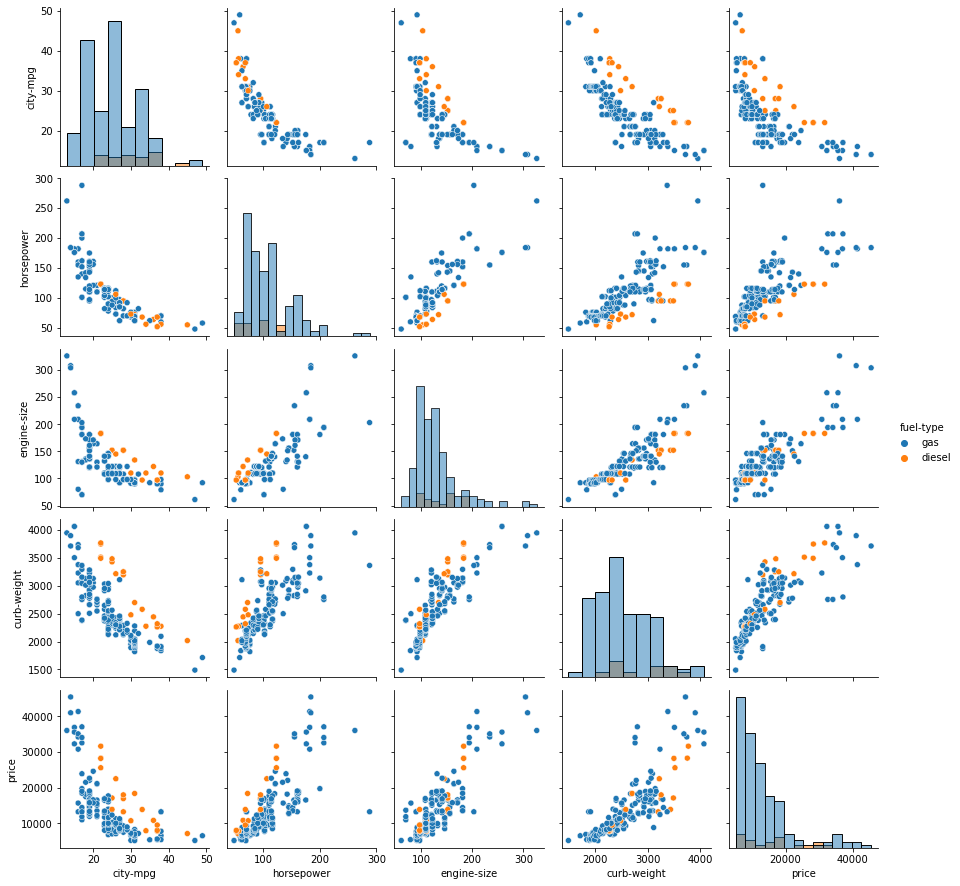

In [24]:
g = sns.pairplot(df_automobile[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

**Findings**
* Vehicle  Mileage decrease as increase in Horsepower , engine-size, Curb Weight
* As horsepower increase  the engine size increases
*  Curbweight increases with the increase in Engine Size

**Price Analysis**
*  engine size and curb-weight  is positively co realted with price
* city-mpg is negatively corelated with price as  increase horsepower reduces the mileage